# Unidad 8 - Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow.

# PySerial: leer y almacenar datos de sensor Arduino.
<p style="background-color:rgba(255, 99, 71, 0.6);">Disclaimer: esto no funciona en Google Colab. Solo pueden utilizarlo localmente. Colab procesa en la nube, no en nuestra compu, por lo tanto no tiene manera de acceder a los puertos USB locales. Recomiendo utilizar VScode con la extensión de Jupyter Notebooks para este fin</p>

Al día de hoy deben estar ya familiarizados con nuestros amigos paquetes **Numpy**, **Pandas** y **MatplotLib**, la santa trinidad del análisis de datos y la física computacional en Python.<br><br>
Hoy les vengo a traer del pasado un viejo amigo: la placa de Arduino.<br><br>
Recordarán que tomar datos con un sensor Arduino y guardarlos (en general) requería  de un trabajo manual y operativo de copiar lo impreso por Serial Monitor y pegarlo en un archivo de texto. (Ojo, esto se puede automatizar con un módulo para tarjetas SD y una biblioteca hecha para tal fin, pero no disponemos de tales herramientas, y con Python podemos rabajar y luego analizar la data de manera mas sencilla).<br><br>

### Pequeña introducción, qué es el Serial?
<em> Spoiler: Haremos un repaso de Arduino en breves.</em><br><br>
Si tienen a mano código _C_ escrito durante la cursada de Compu 2, han de encontrar que utilizábamos un método 'Serial', inicializandolo como <em>Serial.begin(9600);</em> para imprimir por consola con el método <em>Serial.println(variable)</em> dentro del loop.<br><br>
El Serial en Arduino refiere a un puerto de comunicación, es un recurso utilizado para comunicar al Arduino y la computadora, un módulo, o incluso otro Arduino.<br> Podemos establecer comunicación con el microcontrolador a través de puertos USB, dispositivos bluetooth, etc, así como recibir y ver los datos de la comunicación. <br>

<strong>PySerial</strong> es una biblioteca que permite conectarse a todos los puertos serial disponibles, con ella vamos a poder primero buscar en qué puerto está conectado nuestro Arduino. Con este dato, y el BAUD (los bits por segundo que transmite el microcontrolador al serial, en general son 300, 600, 1200, 2400, 4800, 9600, 14400, 19200, 28800, 38400, 57600, o 115200) podremos conectarnos con python a la placa y obtener los datos del sensor que le querramos poner.

In [1]:
#para instalar PySerial, ejecutamos
!pip install PySerial

Defaulting to user installation because normal site-packages is not writeable


Lo primero es entonces, importar la biblioteca

In [4]:
import serial #para leer la data del arduino uno
import serial.tools.list_ports as lp
import numpy as np
import matplotlib.pyplot as plt

Ahora, supongamos que quiero encontrar en qué puerto tengo conectada mi placa, **a la que previamente le cargué un script que toma la info de un sensor fotoresistor que va a devolver un dato numérico entre 0 y 1023.**

In [5]:
### para ver en que puerto tengo el sensor en cuestión
#esta es la versión facil, listar todos los puertos disponibles
ports = list(lp.comports())

for p in ports:
    print(p)

/dev/cu.WH-CH510 - n/a
/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodem1201 - IOUSBHostDevice


Como observarán mas arriba, mi arduino esta en el puerto '/dev/cu.usbmodem1201' al momento de ejecutar este script. El gran problema de esta biblioteca está en que desde Google Colab no es util ya que no ejecuta localmente, por lo tanto no ve los puertos de la compu.
### Cómo conecto mi script jupyter a mi placa arduino?

In [9]:
#declaro dos variables, el puerto donde esta conectada la placa y el BAUD

puerto_arduino = '/dev/cu.usbmodem1201' #el puerto 
baud = 9600 #velocidad de comunicación entre la compu y el arduino

#con el merodo serial.Serial(puerto, baud) puedo conectarme a la placa.

arduino = serial.Serial(port=puerto_arduino, baudrate=baud)  
print(f'Conectado exitosamente al puerto: {puerto_arduino} BAUD rate: {baud}')

Conectado exitosamente al puerto: /dev/cu.usbmodem1201 BAUD rate: 9600


In [71]:
#para cerrar la conexión

arduino.close()

### Leer información del Serial
<em>no se apuren, ya vamos a repasar Arduino, supongamos tenemos un sensor del año pasado armado</em>
Veamos que podría leer continuamente la info de arduino e imprimirla.

In [10]:
def read_sensor_data():
    data = arduino.readline().decode('utf-8').strip()
    print(f'leyendo info sensor: {int(data)}')
 
while True:
    read_sensor_data()


leyendo info sensor: 60
leyendo info sensor: 159
leyendo info sensor: 72
leyendo info sensor: 271
leyendo info sensor: 503
leyendo info sensor: 506
leyendo info sensor: 166
leyendo info sensor: 143
leyendo info sensor: 141
leyendo info sensor: 393
leyendo info sensor: 388
leyendo info sensor: 374
leyendo info sensor: 503
leyendo info sensor: 504
leyendo info sensor: 314
leyendo info sensor: 313
leyendo info sensor: 310


KeyboardInterrupt: 

Pero como vimos, si lo ejecutamos así como está, el loop no vá a cortar nunca.
Tenemos que acotarlo en el tiempo, la biblioteca time la vamos a utilizar para ver en qué momento arranca el script y definirle durante cuanto tiempo queremos que mida el tiempo

In [11]:
import time
t_end = time.time() + 6  #supongamos que quiero que corra mi script durante 5 segundos.

while time.time() < t_end:
    read_sensor_data()


leyendo info sensor: 311
leyendo info sensor: 316
leyendo info sensor: 320
leyendo info sensor: 322
leyendo info sensor: 323
leyendo info sensor: 322
leyendo info sensor: 319
leyendo info sensor: 316
leyendo info sensor: 314
leyendo info sensor: 310
leyendo info sensor: 309
leyendo info sensor: 309
leyendo info sensor: 315
leyendo info sensor: 314
leyendo info sensor: 502
leyendo info sensor: 465
leyendo info sensor: 500
leyendo info sensor: 498
leyendo info sensor: 470
leyendo info sensor: 496
leyendo info sensor: 81


### Leer la información del Serial y guardarla en un array numpy.
Esto es lo importante ya que si no guardamos la información muy dificilmente podamos trabajarla luego, y es el objetivo de este módulo

In [12]:
#inicializamos el array
def save_sensor_data():
    data = arduino.readline().decode('utf-8').strip()
    print(f"Guardando data sensor a las {time.strftime('%H:%M:%S')}: {data}")
    return data 

datos = np.array([])

t_end = time.time() + 10  #supongamos que quiero que corra mi script durante 5 segundos.

while time.time() < t_end:
    data = save_sensor_data()
    datos = np.append(datos, int(data))


Guardando data sensor a las 21:40:08: 65
Guardando data sensor a las 21:40:08: 328
Guardando data sensor a las 21:40:08: 331
Guardando data sensor a las 21:40:08: 335
Guardando data sensor a las 21:40:08: 79
Guardando data sensor a las 21:40:08: 75
Guardando data sensor a las 21:40:08: 75
Guardando data sensor a las 21:40:08: 74
Guardando data sensor a las 21:40:09: 500
Guardando data sensor a las 21:40:10: 501
Guardando data sensor a las 21:40:11: 335
Guardando data sensor a las 21:40:12: 335
Guardando data sensor a las 21:40:13: 87
Guardando data sensor a las 21:40:14: 81
Guardando data sensor a las 21:40:15: 79
Guardando data sensor a las 21:40:16: 81
Guardando data sensor a las 21:40:17: 342
Guardando data sensor a las 21:40:18: 341


Ahora si! imprimo la info que guardé del sensor

In [13]:
print(datos)

[ 65. 328. 331. 335.  79.  75.  75.  74. 500. 501. 335. 335.  87.  81.
  79.  81. 342. 341.]


Podría plotearla y realizar el análisis que quisiera con ella ;)

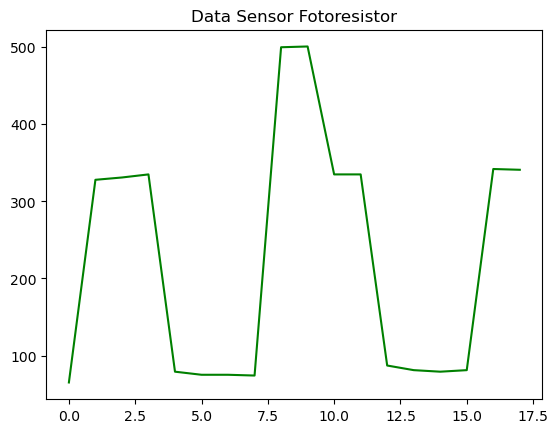

In [16]:
plt.plot(datos, color = 'green')
plt.title('Data Sensor Fotoresistor')
plt.show()